In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,precision_recall_curve,roc_auc_score,f1_score

In [104]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [62]:
df=pd.read_excel('df_incentive.xlsx')

In [23]:
df.groupby(['Incentive'])['Target'].sum()
#this means that with 1 Euro only 1 time target of 75% productivity was achieved

Incentive
1      1
2      0
3      2
4      1
5      5
6      2
7      8
8     10
9      9
10     3
11     7
12    10
13     7
14     9
15    18
16    19
17    12
18    13
19    21
20    14
Name: Target, dtype: int64

In [35]:
df_calc=pd.DataFrame(df.groupby(['Incentive'])['Target'].sum())

In [39]:
df_calc.columns=['Target Sum']
df_calc

,Target Sum
Incentive,
1,1
2,0
3,2
4,1
5,5
6,2
7,8
8,10
9,9


In [17]:
df.groupby('Incentive')['Target'].mean() * 100

Incentive
1       5.263158
2       0.000000
3      16.666667
4       6.666667
5      35.714286
6      15.384615
7      47.058824
8      47.619048
9      50.000000
10     23.076923
11     53.846154
12     62.500000
13     46.666667
14     47.368421
15     81.818182
16     76.000000
17     70.588235
18     81.250000
19    100.000000
20     93.333333
Name: Target, dtype: float64

<AxesSubplot:xlabel='Incentive (€)', ylabel='% of operators achieving target'>

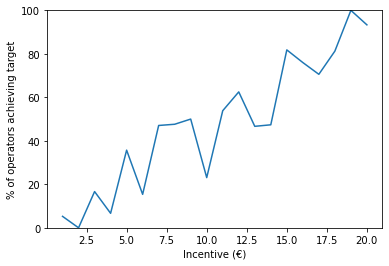

In [16]:
x.plot(xlabel='Incentive (€)', ylabel='% of operators achieving target', ylim=(0, 100))


In [85]:
df_calc = pd.DataFrame(df.groupby(['Incentive'])['Target'].sum())
df_calc.columns = ['Target']
df_calc['No Target'] = df.groupby(['Incentive'])['Target'].count() - df_calc['Target']
df_calc['Total'] = df.groupby(['Incentive'])['Target'].count()
df_calc.reset_index(inplace=True)

In [87]:
df_calc.index = df_calc.index + 1

In [88]:
df_calc

,Incentive,Target,No Target,Total
1,1,1,18,19
2,2,0,15,15
3,3,2,10,12
4,4,1,14,15
5,5,5,9,14
6,6,2,11,13
7,7,8,9,17
8,8,10,11,21
9,9,9,9,18
10,10,3,10,13


### Insights:

- The above dataset basically means that when 1 Euro incentive was given to a total of 19 employees then 1 time target of 75% productivity was achieved whereas 18 times it wasn't achieved and so on!

In [105]:
df

,Incentive,Target
0,16,0
1,10,0
2,19,1
3,12,0
4,19,1
...,...,...
331,6,0
332,17,1
333,8,1
334,2,0


In [136]:
X = df[['Incentive']]
y = df['Target']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state=42)
X_train.shape, X_test.shape

((235, 1), (101, 1))

In [137]:
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    r2_square=r2_score(true,predicted)
    return mae,rmse,r2_square

In [138]:
models={'Linear Regression':LinearRegression(),
        'Logistic Regression':LogisticRegression(),
        'Lasso':Lasso(),
        'Ridge':Ridge(),
        'K-Neighbors Regressor':KNeighborsRegressor(),
        'Decision Tree':DecisionTreeRegressor(),
        'Random Forest Regressor':RandomForestRegressor(),
        'XGBRegressor':XGBRegressor(),
        'CatBoosting Regressor':CatBoostRegressor(verbose=False),
        'AdaBoost Regressor':AdaBoostRegressor()
}
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)#Train model
    
    #Make Predictions
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)
    
    #Evaluation of Train and Test Dataset
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training Set')
    print('- Root Mean Squared Error: {:.4f}'.format(model_train_rmse))
    print('- Mean Absolute Error: {:.4f}'.format(model_train_rmse))
    print('-R2 Score: {:.4f}'.format(model_train_r2))
    
    print('-----------------------------------------------------')
    
    print('Model performance for Test Set')
    print('- Root Mean Squared Error: {:.4f}'.format(model_test_rmse))
    print('- Mean Absolute Error: {:.4f}'.format(model_test_rmse))
    print('-R2 Score: {:.4f}'.format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*30)
    print('\n')
    
    

Linear Regression
Model performance for Training Set
- Root Mean Squared Error: 0.4144
- Mean Absolute Error: 0.4144
-R2 Score: 0.3127
-----------------------------------------------------
Model performance for Test Set
- Root Mean Squared Error: 0.4281
- Mean Absolute Error: 0.4281
-R2 Score: 0.2668


Logistic Regression
Model performance for Training Set
- Root Mean Squared Error: 0.5178
- Mean Absolute Error: 0.5178
-R2 Score: -0.0728
-----------------------------------------------------
Model performance for Test Set
- Root Mean Squared Error: 0.5170
- Mean Absolute Error: 0.5170
-R2 Score: -0.0694


Lasso
Model performance for Training Set
- Root Mean Squared Error: 0.4486
- Mean Absolute Error: 0.4486
-R2 Score: 0.1948
-----------------------------------------------------
Model performance for Test Set
- Root Mean Squared Error: 0.4549
- Mean Absolute Error: 0.4549
-R2 Score: 0.1723


Ridge
Model performance for Training Set
- Root Mean Squared Error: 0.4144
- Mean Absolute Error

In [139]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
3,Ridge,0.266847
0,Linear Regression,0.266844
9,AdaBoost Regressor,0.218525
6,Random Forest Regressor,0.202761
8,CatBoosting Regressor,0.196792
7,XGBRegressor,0.196002
5,Decision Tree,0.195868
2,Lasso,0.172289
4,K-Neighbors Regressor,0.098525
1,Logistic Regression,-0.069412


In [142]:
lin_model=LinearRegression(fit_intercept=True)
lin_model=lin_model.fit(X_train,y_train)
y_pred=lin_model.predict(X_test)

from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print("The accuracy of our model is {}%".format(round(score, 4) *100))


The accuracy of our model is 26.68%


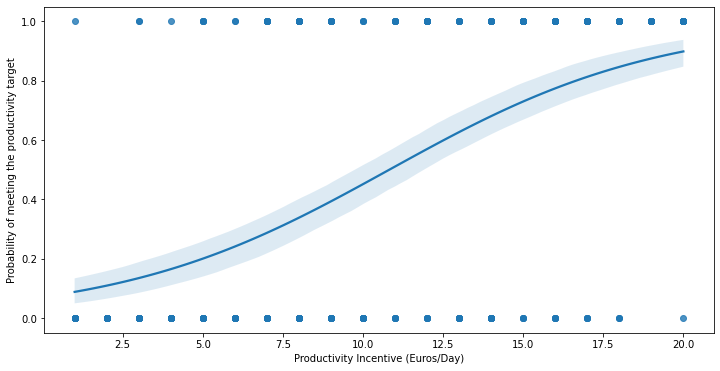

In [131]:
plt.figure(figsize=(12, 6))
ax = plt.gca()
sns.regplot(x='Incentive', y='Target', data=df, logistic=True,ax = ax)
plt.xlabel('Productivity Incentive (Euros/Day)')
plt.ylabel('Probability of meeting the productivity target')
plt.show()

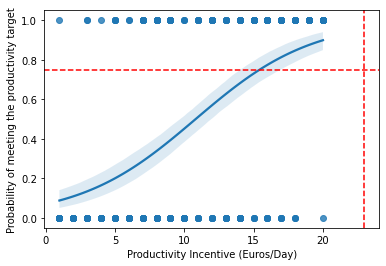

In [144]:
# Plot the scatter plot with logistic regression line
sns.regplot(x='Incentive', y='Target', data=df, logistic=True)

# Get the x-coordinate at which the probability of meeting the productivity target is 0.75
x_coord = (np.log(0.75 / (1 - 0.75)) - lin_model.intercept_) / lin_model.coef_[0]

# Add a vertical line at the x-coordinate
plt.axvline(x_coord, color='red', linestyle='--')

# Add a horizontal line at y=0.75
plt.axhline(0.75, color='red', linestyle='--')

# Set the x-axis label and y-axis label
plt.xlabel('Productivity Incentive (Euros/Day)')
plt.ylabel('Probability of meeting the productivity target')

# Display the plot
plt.show()


Optimization terminated successfully.
         Current function value: 0.526429
         Iterations 6


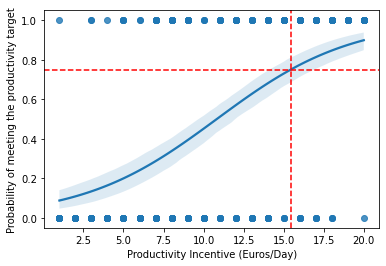

In [148]:
import statsmodels.api as sm

import numpy as np

# Train the logistic regression model
model = sm.Logit(df['Target'], sm.add_constant(df['Incentive'])).fit()

# Get the x-coordinate at which the probability of meeting the productivity target is 0.75
x_coord = (np.log(0.75 / (1 - 0.75)) - model.params[0]) / model.params[1]

# Plot the scatter plot with logistic regression line
sns.regplot(x='Incentive', y='Target', data=df, logistic=True)

# Add a vertical line at the x-coordinate
plt.axvline(x_coord, color='red', linestyle='--')

# Add a horizontal line at y=0.75
plt.axhline(0.75, color='red', linestyle='--')

# Set the x-axis label and y-axis label
plt.xlabel('Productivity Incentive (Euros/Day)')
plt.ylabel('Probability of meeting the productivity target')

# Display the plot
plt.show()